## Deliverable Draft

## 0 - sample library 

### 0.0 - pulling data from the city of boston (cob)

In [45]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
#parameters: none
#returns: a dictionary, with plaintext keys corresponding to the resource ID
#notes: the resource ID is data.boston.gov 's internal identifier for datasets
def getSourceDict():
    sources = {"CRIMEINCIDENTREPORTS_2022": "313e56df-6d77-49d2-9c49-ee411f10cf58",
                "CRIMEINCIDENTREPORTS_2021": "f4495ee9-c42c-4019-82c1-d067f07e45d2",
                "CRIMEINCIDENTREPORTS_2020": "be047094-85fe-4104-a480-4fa3d03f9623",
                "CRIMEINCIDENTREPORTS_2019": "34e0ae6b-8c94-4998-ae9e-1b51551fe9ba",
                "CRIMEINCIDENTREPORTS_2018": "e86f8e38-a23c-4c1a-8455-c8f94210a8f1",
                "SHOOTINGS": "313e56df-6d77-49d2-9c49-ee411f10cf58",
                "SHOTSFIRED": "e16705ca-49ce-4803-84c1-c9848aa63024",
                "FIELDINTERROGATION_2020": "64dd32d9-26f9-4275-9265-97fa3de7e22b",
                "FIELDINTERROGATION_2019": "03f33240-47c1-46f2-87ae-bcdabec092ad",
                "FIELDINTERROGATION_2016": "35f3fb8f-4a01-4242-9758-f664e7ead125",
                "FIREARM_RECOVERY": "a3d2260f-8a41-4e95-9134-d14711b0f954",
                "EARNINGS_2021": "ec5aaf93-1509-4641-9310-28e62e028457",
                "EARNINGS_2020": "e2e2c23a-6fc7-4456-8751-5321d8aa869b",
                "EARNINGS_2019": "3bdfe6dc-3a81-49ce-accc-22161e2f7e74",
                "EARNINGS_2018": "31358fd1-849a-48e0-8285-e813f6efbdf1",
                "EARNINGS_2017": "70129b87-bd4e-49bb-aa09-77644da73503",
                "EARNINGS_2016": "8368bd3d-3633-4927-8355-2a2f9811ab4f",
                "EARNINGS_2015": "2ff6343f-850d-46e7-98d1-aca79b619fd6",
                "EARNINGS_2014": "941c9de4-fb91-41bb-ad5a-43a35f5dc80f",
                "EARNINGS_2013": "fac6a421-72fb-4f85-b4ac-4aca1e32d94e",
                "EARNINGS_2012": "d96dd8ad-9396-484a-87af-4d15e9e2ccb2",
                "EARNINGS_2011": "a861eff8-facc-4372-9b2d-262c2887b19e",
                "CHECKBOOK_2022": "0a261d4e-3eec-4bac-bf72-b9a7aa77b033",
                "CHECKBOOK_2021": "32897eeb-d9ca-494f-93b1-991c50bcd6a6",
                "CHECKBOOK_2020": "c093700f-d78a-49de-a8fe-508ba834ff6f",
                "CHECKBOOK_2019": "38227f56-46ed-47fe-9e1c-5d2fce52908d",
                "CHECKBOOK_2018": "5d8e373f-29a0-472c-b39b-9aa249e86fd5",
                "CHECKBOOK_2017": "01a5c35c-19e3-419e-a8b5-cb623525b96d",
                "CHECKBOOK_2016": "ae5a15cc-8bd3-455d-8cbb-9221e07c1426",
                "CHECKBOOK_2015": "5714ab9f-52d3-4c41-b2a6-2700b41438fc",
                "CHECKBOOK_2014": "69eab395-07d3-41b8-a021-a0d314bd8046",
                "CHECKBOOK_2013": "c2bc5615-9478-4a9b-b71c-f63f6364e409",
                "CHECKBOOK_2012": "fd5c56a7-224f-41c4-a011-969b8aee457d"
                }
    return(sources)

#parameters: the plaintext name of the source you'd like to get the resource ID for
#returns: a string with the resource ID corresponding to your parameter
def sourcetorid(sourcename):
    rid = getSourceDict()[sourcename]
    return(rid)
#parameters: none
#returns: a list of all selectable sources in the source dictionary
def list_sources():
    sourcelist=[]
    q = getSourceDict()
    for key in q:
        sourcelist.append(key)
    return(sourcelist)
#parameters: the resource id, and an integer; n
#returns: the response from the database at resource id rid, including only the first n entries
#notes: resource id, int n -> json (results which are the first n)
def n_recent(rid, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"&limit="+str(n))
    return(r.json())

#parameters: the resource id, and a string; n
#returns: the response from the database at resource id rid, including only the entries which contain string n
#notes: resource id, string n -> json (results which are those which contain n)
def n_contained(rid, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"&q="+str(n))
    return(r.json())

#parameters: the resource id, an integer; and an integer; n
#returns: the response from the database at resource id rid, including only r entries after index n
#notes: resource id, int r (the number of results to return), int n (the starting index) -> json (results which start at n, go to n+r)
def n_skip(rid, r, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"$top=",r,"&$skip=",n)
    return(r.json())
#parameters: a json returned by a request function such as n_recent, n_contained, and n_skip
#returns: the field names of the same json
#notes: request json -> list of fields in the result w/ types and names
def return_fields(returnedjson):
    field_dictionary = {}
    returnfields = returnedjson['result']['fields']
    for x in range(0, len(returnfields)):
        field_dictionary[returnfields[x]['id']] = returnfields[x]['type']
    return(field_dictionary)

#parameters: a json returned by a request function such as n_recent, n_contained, and n_skip
#returns: the same json, stripped of metadata
#notes: request result -> nice format to parse
def eat_result(eson):
    re = eson['result']['records']
    return(re)


### 0.1 - processing data from the city of boston (cob)

In [46]:
#parameters: the output of a request that has been stripped of metadata via the function eat_result, those fields
#returns: the same json, cleaned of problematic characters, converted to the proper type, etc
#notes: request result -> eat_result() -> output -> cleanthecob() -> format which is both nice & parse-safe
#notes cont: in an ideal world
def cleanthecob(a, afields):
    print("Cleaning... expect debug messages...")
    #characters which ALWAYS cause problems
    badchars = ["$",",","(",")","'",'"']
    #characters which are used in place of zeros often
    zerochars = ["None"]
    for row in range(0, len(a)):
        for column in a[row]:
            
            if(a[row][column] is None):
                a[row][column] = "None"
                
            a[row][column]=str(a[row][column])
            
            for bad in badchars:
                if(afields[column]=='int'):
                    a[row][column]=a[row][column].replace(bad, "")
    
                elif(afields[column]=='text'):
                     a[row][column]=a[row][column].replace(bad, " ")

            if(afields[column]=='int'):
                #print(row)
                a[row][column]=a[row][column].replace("None", "0")
                try:
                    a[row][column]=float(a[row][column])
                except Exception as e:
                    print("Row: ", str(row))
                    print("Column: ", str(column))
                    print(e)
                    print("Value: ", a[row][column])
                    print("Rewriting as -1.0")
                    a[row][column]= -1.0
                    
                
    return(a)

def scatterplot(our_cleaned_dataframe, xname, yname):
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=45)
    sns.set(rc = {'figure.figsize':(100,100)})
    sns.set(font_scale = 8)
    #plt.invert_yaxis()
    sns.scatterplot(data=our_cleaned_dataframe, x=xname, y=yname, hue=yname,legend = False, s=150)
    plt.show()

#parameters: the output of a cleaned request
#returns: that same output, stored in a pandas dataframe
#notes: request result -> eat_result() -> output -> cleanthecob() -> format which is both nice & parse-safe -> cobtopandas()
def cobtopandas(a):
    pass
#parameters: a pandas formatted cob dataset
#returns: true or false, whether the save was succesful or not
#notes: output of cobtopandas() -> pandastocsv()
def pandacobtocsv(a):
    pass




## 1 - example usage of sample library

Cleaning... expect debug messages...
Row:  12563
Column:  INJURED
could not convert string to float: 'INJURED'
Value:  INJURED
Rewriting as -1.0
Row:  12563
Column:  DETAIL
could not convert string to float: 'DETAIL'
Value:  DETAIL
Rewriting as -1.0
Row:  12563
Column:  OTHER
could not convert string to float: 'OTHER'
Value:  OTHER
Rewriting as -1.0
Row:  12563
Column:  OVERTIME
could not convert string to float: 'OVERTIME'
Value:  OVERTIME
Rewriting as -1.0
Row:  12563
Column:  REGULAR
could not convert string to float: 'REGULAR'
Value:  REGULAR
Rewriting as -1.0
Row:  12563
Column:  RETRO
could not convert string to float: 'RETRO'
Value:  RETRO
Rewriting as -1.0
Row:  22131
Column:  INJURED
could not convert string to float: 'INJURED'
Value:  INJURED
Rewriting as -1.0
Row:  22131
Column:  DETAIL
could not convert string to float: 'DETAIL'
Value:  DETAIL
Rewriting as -1.0
Row:  22131
Column:  OTHER
could not convert string to float: 'OTHER'
Value:  OTHER
Rewriting as -1.0
Row:  22131


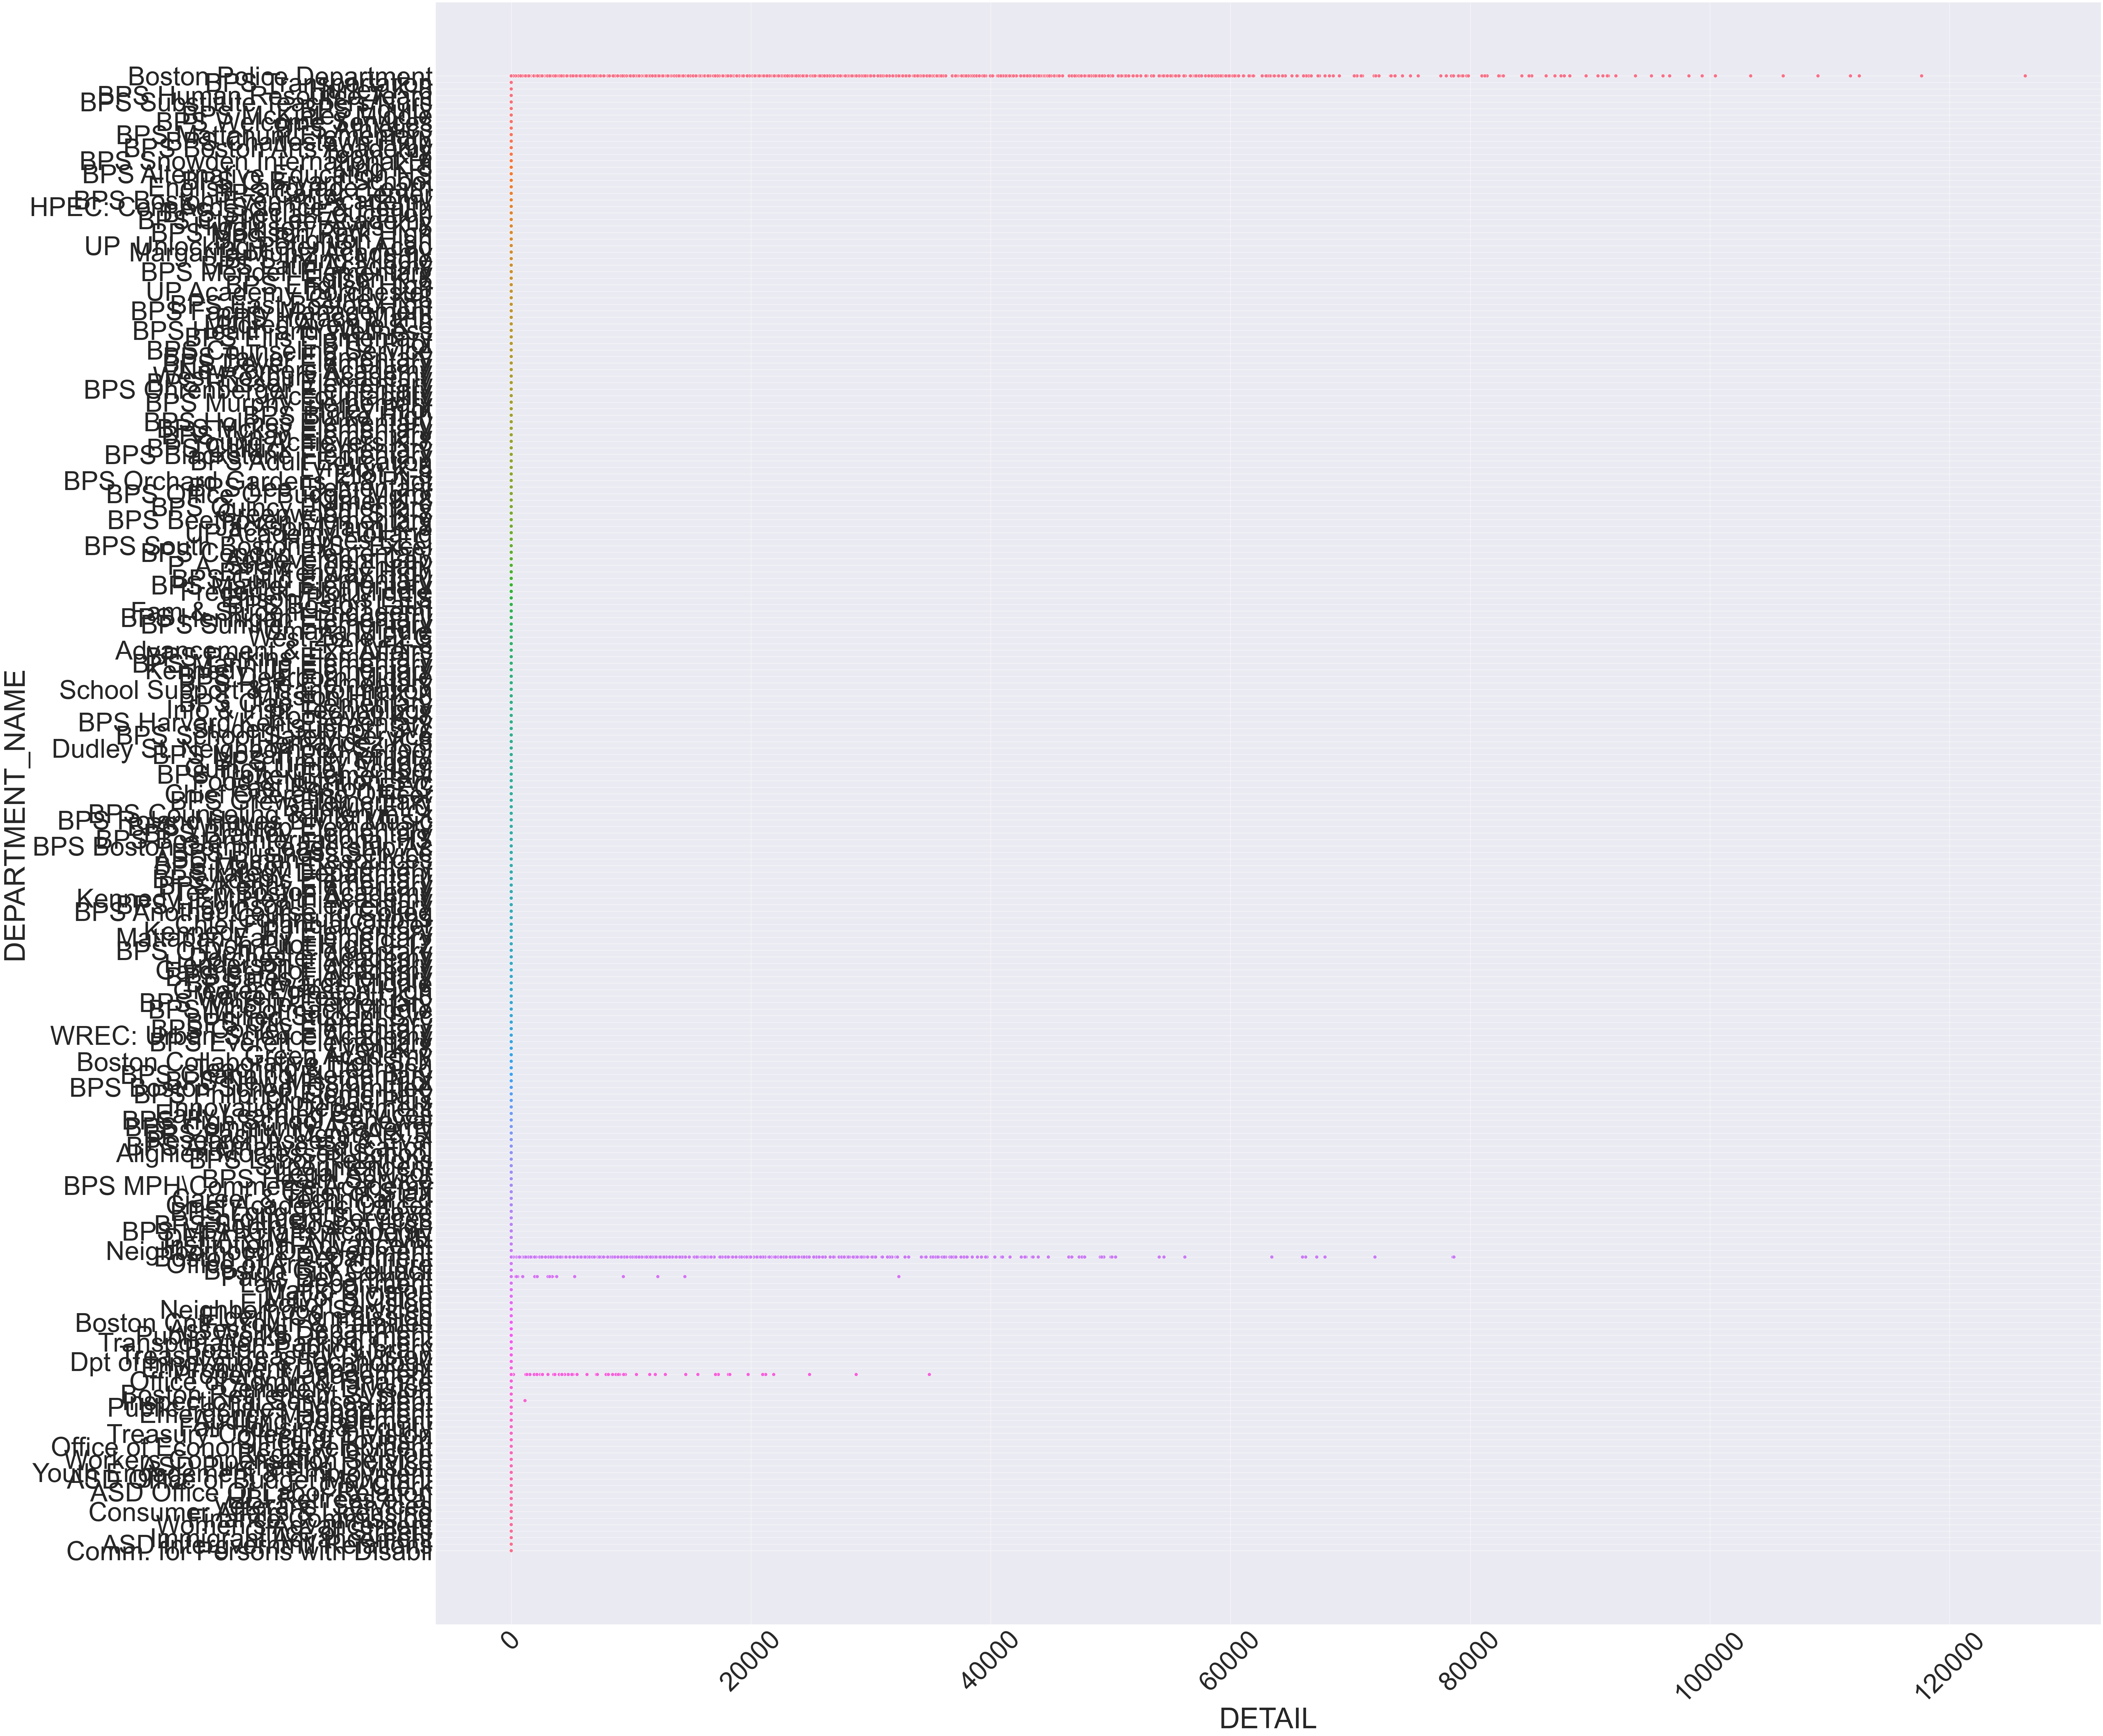

In [49]:

import numpy as np
import pandas as pd
#specifying the number of entries
#using 100000 to get all of the entries, if there are less than n it only returns what there is
n = 100000
#selecting the database
selected="EARNINGS_2018"
#converting the source name to a resource ID
rid = sourcetorid(selected)
#getting the field names
rid_fields = return_fields(n_recent(rid, 1))
rid_names = rid_fields.keys()
#stripping the result of metadata
re = eat_result(n_recent(rid, n))
rid_fields['REGULAR']='int'
rid_fields['OVERTIME']='int'
rid_fields['RETRO']='int'
rid_fields['OTHER']='int'
rid_fields['INJURED']='int'
rid_fields['DETAIL']='int'

#cleaning the text
cleanre = cleanthecob(re, rid_fields)
print(rid_fields)
#cleanre=re
our_dataframe = pd.DataFrame(data=cleanre[1:len(cleanre)], columns=rid_fields)
#print(np.var(our_dataframe["REGULAR"]))
scatterplot(our_dataframe, "DETAIL", "DEPARTMENT_NAME")

